In [1]:
import sys
sys.path.append('..')
import os
import shutil
import time
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing_logging

from download_audioset import download_subset_files, BALANCED_TRAIN_URL, init_console_logger

In [2]:
# Configurations
data_dir = 'test'
ffmpeg_path = '../bin/ffmpeg/ffmpeg'
num_videos = 25

In [3]:
init_console_logger(True)
multiprocessing_logging.install_mp_handler()

In [4]:
def get_file_sizes(top, exts=None):
    if exts is None:
        exts = []

    total_size = 0
    
    ext_sizes = {}
    for idx, ext in enumerate(exts):
        # Ensure extensions start with a period
        if ext[0] != '.':
            exts[idx] = '.' + ext
        ext_sizes[ext] = []
        
    exts = set(exts)
        
    for root, dirs, files in os.walk(top):
        for filename in files:
            path = os.path.join(root, filename)
            size = os.path.getsize(path)
            total_size += size
            
            ext = os.path.splitext(filename)[-1]
            if ext in exts:
                ext_sizes[ext].append(size)
    return total_size, ext_sizes

In [6]:
def examine_results(data_dir, exts, total_time):
    total_size, ext_sizes = get_file_sizes(data_dir, exts)
    for ext in exts:
        sizes = np.array(ext_sizes[ext]) / 1000000 # Convert to MB (MEGABytes)
        print(ext)
        print("==========================")
        print("Number of files:\t{}".format(sizes.size))
        print("Total size:\t\t{0:.2f} MB".format(np.sum(sizes)))
        mean = np.mean(sizes)
        print("Mean:\t\t\t{0:.2f} MB".format(mean))
        print("Median:\t\t\t{0:.2f} MB".format(np.median(sizes)))
        print("Std. Dev.:\t\t{0:.2f} MB".format(np.std(sizes)))
        print("")
        print("Estimated Size for 2.1MM Tracks:\t{0:.2f} TB".format(2100000 * mean/1000000))
        
        plt.figure()
        plt.hist(sizes)
        plt.title('Distribution of {} file sizes'.format(ext))
        plt.xlabel('File size (MB)')
        plt.ylabel('Frequency')
        plt.show()
        
    print("Total processing time:\t{0:.2f} sec".format(total_time))
    print("Processing time per video:\t{0:.2f} sec".format(total_time / sizes.size))

        

# Examine the distribution of file sizes per file type when audio is included in the video files

In [ ]:
t_start = time.time()
download_subset_files(BALANCED_TRAIN_URL, data_dir, ffmpeg_path, 4, max_videos=50)
t_vwa = time.time() - t_start

2017-09-29 00:38:48,188 - audiosetdl - INFO - Downloading subset file for "balanced_train_segments"
2017-09-29 00:38:48,550 - audiosetdl - INFO - Starting download jobs for subset "balanced_train_segments"
2017-09-29 00:38:48,568 - audiosetdl - INFO - Attempting to download video --PJHxphWEs (30.0 - 40.0)
2017-09-29 00:38:48,567 - audiosetdl - INFO - Reached maximum (50) for subset balanced_train_segments
2017-09-29 00:38:48,568 - audiosetdl - INFO - Attempting to download video --aE2O5G5WE (0.0 - 10.0)
2017-09-29 00:38:48,568 - audiosetdl - INFO - Attempting to download video --ZhevVpy1s (50.0 - 60.0)
2017-09-29 00:38:48,570 - audiosetdl - INFO - Attempting to download video --aO5cdqSAg (30.0 - 40.0)
2017-09-29 00:38:57,390 - audiosetdl - INFO - Downloaded video --aO5cdqSAg (30.0 - 40.0)
2017-09-29 00:38:57,402 - audiosetdl - INFO - Attempting to download video --aaILOrkII (200.0 - 210.0)
2017-09-29 00:39:23,381 - audiosetdl - INFO - Downloaded video --aE2O5G5WE (0.0 - 10.0)
2017-09-2

2017-09-29 00:40:51,966 - audiosetdl - INFO - Downloaded video -275_wTLm-4 (7.0 - 17.0)
2017-09-29 00:40:51,983 - audiosetdl - INFO - Attempting to download video -2hQKCE-oTI (30.0 - 40.0)
2017-09-29 00:40:58,084 - audiosetdl - INFO - Downloaded video -2PDE7hUArE (30.0 - 40.0)
2017-09-29 00:40:58,110 - audiosetdl - INFO - Attempting to download video -30H9V1IKps (6.0 - 16.0)
2017-09-29 00:41:00,446 - audiosetdl - INFO - Downloaded video -2X03mO3T_U (30.0 - 40.0)
2017-09-29 00:41:00,448 - audiosetdl - INFO - Attempting to download video -38Qgsbh7NQ (100.0 - 110.0)
2017-09-29 00:41:05,619 - audiosetdl - INFO - Downloaded video -2hQKCE-oTI (30.0 - 40.0)
2017-09-29 00:41:05,629 - audiosetdl - INFO - Attempting to download video -3HYdaJyF4U (30.0 - 40.0)
2017-09-29 00:41:05,715 - audiosetdl - INFO - Downloaded video -30H9V1IKps (6.0 - 16.0)
2017-09-29 00:41:05,717 - audiosetdl - INFO - Attempting to download video -3IGxVTJvgI (30.0 - 40.0)
2017-09-29 00:41:06,230 - audiosetdl - INFO - Downl

.mp4
Number of files:	49
Total size:		59.29 MB
Mean:			1.21 MB
Median:			0.78 MB
Std. Dev.:		1.12 MB

Estimated Size for 2.1MM Tracks:	2540967.09 MB


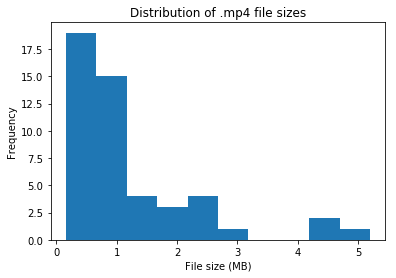

.flac
Number of files:	49
Total size:		32.45 MB
Mean:			0.66 MB
Median:			0.62 MB
Std. Dev.:		0.28 MB

Estimated Size for 2.1MM Tracks:	1390691.31 MB


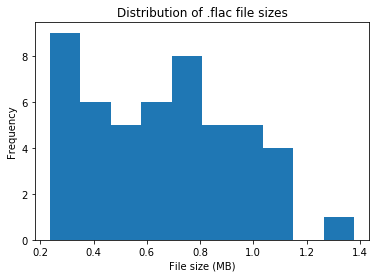

Total processing time:	44.92 sec
Processing time per video:	0.92 sec


In [10]:
examine_results(data_dir, ['.mp4', '.flac'], t_vwa)

In [11]:
shutil.rmtree(data_dir)

# Examine the distribution of file sizes per file type when audio is NOT included in the video files

In [10]:
# Look at videos _without_ audio
t_start = time.time()
download_subset_files(BALANCED_TRAIN_URL, data_dir, ffmpeg_path, 4, max_videos=50, video_with_audio=False)
t_vwoa = time.time() - t_start

2017-09-29 00:33:01,871 - audiosetdl - INFO - Downloading subset file for "balanced_train_segments"
2017-09-29 00:33:02,398 - audiosetdl - INFO - Starting download jobs for subset "balanced_train_segments"
2017-09-29 00:33:02,415 - audiosetdl - INFO - Reached maximum (50) for subset balanced_train_segments
2017-09-29 00:33:02,415 - audiosetdl - INFO - Attempting to download video --ZhevVpy1s (50.0 - 60.0)
2017-09-29 00:33:02,417 - audiosetdl - INFO - Attempting to download video --aE2O5G5WE (0.0 - 10.0)
2017-09-29 00:33:02,415 - audiosetdl - INFO - Attempting to download video --PJHxphWEs (30.0 - 40.0)
2017-09-29 00:33:02,421 - audiosetdl - INFO - Attempting to download video --aO5cdqSAg (30.0 - 40.0)
2017-09-29 00:33:11,093 - audiosetdl - INFO - Downloaded video --aO5cdqSAg (30.0 - 40.0)
2017-09-29 00:33:11,102 - audiosetdl - INFO - Attempting to download video --aaILOrkII (200.0 - 210.0)
2017-09-29 00:33:37,691 - audiosetdl - INFO - Downloaded video --aE2O5G5WE (0.0 - 10.0)
2017-09-2

2017-09-29 00:34:54,289 - audiosetdl - INFO - Downloaded video -275_wTLm-4 (7.0 - 17.0)
2017-09-29 00:34:54,297 - audiosetdl - INFO - Attempting to download video -2hQKCE-oTI (30.0 - 40.0)
2017-09-29 00:35:02,033 - audiosetdl - INFO - Downloaded video -2PDE7hUArE (30.0 - 40.0)
2017-09-29 00:35:02,039 - audiosetdl - INFO - Attempting to download video -30H9V1IKps (6.0 - 16.0)
2017-09-29 00:35:02,552 - audiosetdl - INFO - Downloaded video -2X03mO3T_U (30.0 - 40.0)
2017-09-29 00:35:02,559 - audiosetdl - INFO - Attempting to download video -38Qgsbh7NQ (100.0 - 110.0)
2017-09-29 00:35:07,605 - audiosetdl - INFO - Downloaded video -2hQKCE-oTI (30.0 - 40.0)
2017-09-29 00:35:07,617 - audiosetdl - INFO - Attempting to download video -3HYdaJyF4U (30.0 - 40.0)
2017-09-29 00:35:08,286 - audiosetdl - INFO - Downloaded video -38Qgsbh7NQ (100.0 - 110.0)
2017-09-29 00:35:08,300 - audiosetdl - INFO - Attempting to download video -3IGxVTJvgI (30.0 - 40.0)
2017-09-29 00:35:08,759 - audiosetdl - INFO - Do

.mp4
Number of files:	49
Total size:		60.75 MB
Mean:			1.24 MB
Median:			0.78 MB
Std. Dev.:		1.16 MB

Estimated Size for 2.1MM Tracks:	2.60 TB


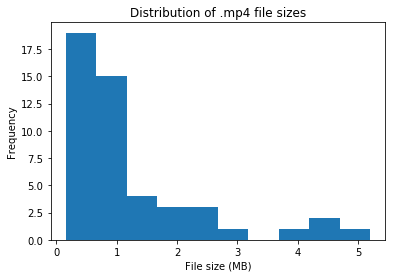

.flac
Number of files:	49
Total size:		32.45 MB
Mean:			0.66 MB
Median:			0.62 MB
Std. Dev.:		0.28 MB

Estimated Size for 2.1MM Tracks:	1.39 TB


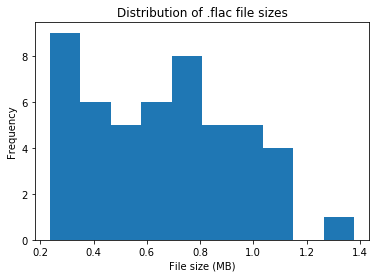

Total processing time:	213.69 sec
Processing time per video:	4.36 sec


In [11]:
examine_results(data_dir, ['.mp4', '.flac'], t_vwoa)

In [12]:
shutil.rmtree(data_dir)